In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dongshiyuan/casiab")

print("Path to dataset files:", path)

100%|██████████| 363M/363M [00:03<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dongshiyuan/casiab/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/CASIA-B/output"
print("Contents of dataset:", os.listdir(dataset_path))


Contents of dataset: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023']


In [ ]:
dataset_path = "/content/drive/MyDrive/CASIA-B/output"

def list_dataset_structure(path, level=0):
    indent = " " * (level * 4)
    for item in sorted(os.listdir(path)):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print(f"{indent} {item}/")
            list_dataset_structure(item_path, level + 1)
        else:
            print(f"{indent} {item}")
print(f"Dataset Structure at: {dataset_path}\n")
list_dataset_structure(dataset_path)


Dataset Structure at: /content/drive/MyDrive/CASIA-B/output

 001/
     bg-01/
         000/
             001-bg-01-000-001.png
             001-bg-01-000-002.png
             001-bg-01-000-003.png
             001-bg-01-000-004.png
             001-bg-01-000-005.png
             001-bg-01-000-006.png
             001-bg-01-000-007.png
             001-bg-01-000-008.png
             001-bg-01-000-009.png
             001-bg-01-000-010.png
             001-bg-01-000-011.png
             001-bg-01-000-012.png
             001-bg-01-000-013.png
             001-bg-01-000-014.png
             001-bg-01-000-015.png
             001-bg-01-000-016.png
             001-bg-01-000-017.png
             001-bg-01-000-018.png
             001-bg-01-000-019.png
             001-bg-01-000-020.png
             001-bg-01-000-021.png
             001-bg-01-000-022.png
             001-bg-01-000-023.png
             001-bg-01-000-024.png
             001-bg-01-000-025.png
             001-bg-01-000-026.p

KeyboardInterrupt: 

In [ ]:
dataset_path = "/content/drive/MyDrive/CASIA-B/output"

def find_valid_sequence(path):
    for root, dirs, files in os.walk(path):
        image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]

        if image_files:
            img_path = os.path.join(root, image_files[0])
            print(f" Found image: {img_path}")
            return img_path
    print("No images found in the dataset.")
    return None

image_path = find_valid_sequence(dataset_path)


 Found image: /content/drive/MyDrive/CASIA-B/output/001/bg-01/000/001-bg-01-000-001.png


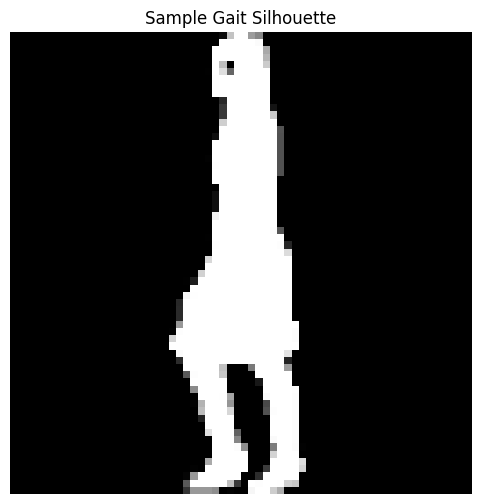

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

if image_path:
    img = Image.open(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title("Sample Gait Silhouette")
    plt.axis('off')
    plt.show()
else:
    print("No valid images to display.")


In [ ]:
# Check permissions
!ls -l /content/drive/MyDrive/CASIA-B/output

total 92
drwx------ 12 root root 4096 Mar 25 05:42 001
drwx------  2 root root 4096 Mar 25 05:43 002
drwx------  2 root root 4096 Mar 25 05:44 003
drwx------  2 root root 4096 Mar 25 05:45 004
drwx------  2 root root 4096 Mar 25 05:47 005
drwx------  2 root root 4096 Mar 25 05:47 006
drwx------  2 root root 4096 Mar 25 05:48 007
drwx------  2 root root 4096 Mar 25 05:49 008
drwx------  2 root root 4096 Mar 25 05:50 009
drwx------  2 root root 4096 Mar 25 05:52 010
drwx------  2 root root 4096 Mar 25 05:53 011
drwx------  2 root root 4096 Mar 25 05:54 012
drwx------  2 root root 4096 Mar 25 05:55 013
drwx------  2 root root 4096 Mar 25 05:56 014
drwx------  2 root root 4096 Mar 25 05:58 015
drwx------  2 root root 4096 Mar 25 05:59 016
drwx------  2 root root 4096 Mar 25 06:00 017
drwx------  2 root root 4096 Mar 25 06:01 018
drwx------  2 root root 4096 Mar 25 06:02 019
drwx------  2 root root 4096 Mar 25 06:03 020
drwx------  2 root root 4096 Mar 25 06:04 021
drwx------  2 root root 4

In [ ]:
# Grant read/write permissions
!chmod -R 755 /content/drive/MyDrive/CASIA-B/output

^C


In [ ]:
import tensorflow as tf
import os
import numpy as np

class GaitDataset:
    def __init__(self, root_dir, sequence_length=10, min_sequence_length=1, img_size=(128, 128)):
        self.root_dir = root_dir
        self.sequence_length = sequence_length
        self.min_sequence_length = min_sequence_length
        self.img_size = img_size
        self.data = []

        self._load_sequences()

    def _load_sequences(self):
        for person in sorted(os.listdir(self.root_dir)):
            person_dir = os.path.join(self.root_dir, person)

            if os.path.isdir(person_dir):
                label = self.get_label(person)

                for seq in sorted(os.listdir(person_dir)):
                    seq_path = os.path.join(person_dir, seq)

                    if os.path.isdir(seq_path):
                        nested_dirs = [os.path.join(seq_path, d) for d in os.listdir(seq_path)
                                       if os.path.isdir(os.path.join(seq_path, d))]

                        for nested_dir in nested_dirs:
                            img_files = [f for f in sorted(os.listdir(nested_dir))
                                         if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

                            if len(img_files) > 0:
                                img_files = img_files[:self.sequence_length]

                                img_paths = [os.path.join(nested_dir, img) for img in img_files]

                                self.data.append((img_paths, label))
                                print(f"Added sequence: {nested_dir} with {len(img_files)} images, label: {label}")
                            else:
                                print(f"No images found in: {nested_dir}")

    def get_label(self, person_id):
        return int(''.join(filter(str.isdigit, person_id)))

    def _load_image(self, img_path):
        try:
            img = tf.io.read_file(img_path)
            img = tf.image.decode_png(img, channels=1)
            img = tf.image.resize(img, self.img_size)
            img = img/255.0
            return img
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return tf.zeros(self.img_size + (1,), dtype=tf.float32)

    def _pad_sequence(self, images):  ##for less number of frames
        num_missing = self.sequence_length - len(images)

        if num_missing > 0:
            blank_image = tf.zeros_like(images[0])  # Black silhouette
            blank_images = tf.repeat(blank_image[tf.newaxis, ...], num_missing, axis=0)
            images = tf.concat([images, blank_images], axis=0)

        return images

    def create_tf_dataset(self, batch_size=16, data=None): # TensorFlow dataset with labels
        if data is None:
            data = self.data

        def generator():
            for sequence, label in data:
                images = []
                for img_path in sequence:
                    img = self._load_image(img_path)
                    images.append(img)

                images = tf.stack(images)
                images = self._pad_sequence(images)

                yield images, label

        output_signature = (
            tf.TensorSpec(shape=(self.sequence_length, *self.img_size, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )

        tf_dataset = tf.data.Dataset.from_generator(
            generator,
            output_signature=output_signature
        )

        tf_dataset = tf_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

        return tf_dataset


In [ ]:
dataset_path = "/content/drive/MyDrive/CASIA-B/output"

gait_dataset = GaitDataset(dataset_path, sequence_length=10)

Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/000 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/018 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/036 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/054 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/072 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/090 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/108 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/126 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/144 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/162 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/bg-01/180 wi

In [ ]:
from collections import defaultdict
from sklearn.model_selection import train_test_split

person_to_frames = defaultdict(list)

for img_paths, label in gait_dataset.data:
    person_to_frames[label].append(img_paths)

person_ids = list(person_to_frames.keys()) #getting unique ids

# Split by Object IDs
train_ids, test_ids = train_test_split(person_ids, test_size=0.2, random_state=42)

train_data = []
test_data = []

for person_id in train_ids:
    for frames in person_to_frames[person_id]:
        train_data.append((frames, person_id))

for person_id in test_ids:
    for frames in person_to_frames[person_id]:
        test_data.append((frames, person_id))

print(f"Train: {len(train_data)}, Test: {len(test_data)}")


Train: 1970, Test: 550


In [ ]:
batch_size=16

train_dataset_obj = GaitDataset(dataset_path, sequence_length=10)
train_dataset_obj.data = train_data

val_dataset_obj = GaitDataset(dataset_path, sequence_length=10)
val_dataset_obj.data = test_data

train_dataset = train_dataset_obj.create_tf_dataset(batch_size=batch_size)
val_dataset = val_dataset_obj.create_tf_dataset(batch_size=batch_size)

Streaming output truncated to the last 5000 lines.
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/cl-02/126 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/cl-02/144 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/cl-02/162 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/cl-02/180 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/000 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/018 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/036 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/054 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/072 with 10 images, label: 1
Added sequence: /content/drive/MyDrive/CASIA-B/output/001/nm-01/090 with 10 images, label: 1
Added sequence: /co

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_gait_model(input_shape=(10, 128, 128, 1), num_classes=25):
    inputs = tf.keras.Input(shape=input_shape)

    # CNN architecture
    x = layers.Conv3D(32, kernel_size=(3, 3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)

    x = layers.Conv3D(64, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)

    x = layers.Conv3D(128, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Reshaping CNN output for LSTM
    x = layers.Reshape((x.shape[1], -1))(x)

    # LSTM layers
    x = layers.LayerNormalization()(x)

    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)

    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=False))(x)

    # Classification Layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    return model


In [ ]:
model = build_gait_model(input_shape=(10, 128, 128, 1), num_classes=25)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10

In [ ]:
steps_per_epoch = len(train_data) // batch_size
validation_steps = len(test_data) // batch_size

In [ ]:
print(f"Train dataset cardinality: {tf.data.experimental.cardinality(train_dataset).numpy()}")

Train dataset cardinality: -2


In [ ]:
history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/10
 86/123 ━━━━━━━━━━━━━━━━━━━━ 41:32 67s/step - accuracy: 0.2339 - loss: 3.2043

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-4295b654aa1b>", line 1, in <cell line: 0>
    history = model.fit(train_dataset,
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_u

TypeError: object of type 'NoneType' has no len()